In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew

#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from sklearn.preprocessing import LabelEncoder


In [2]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv(r"C:\Users\16210\Documents\WeChat Files\wxid_wf9910ps0bou22\FileStorage\File\2024-05\链家陕西房价处理后.csv")

# 使用apply方法和lambda函数修改关注度列
data['关注度'] = data['关注度'].apply(lambda x: 1 if x != 0 else 0)

# 显示前几行数据，以查看修改结果
print(data.head())

     ID                         地址  户型  面积（平米）  单价（元/平米）  总价（w）  发布时间  关注度
0  陕西西安     万达旁 鸿坤花语墅下叠  带车位 带个小院子   5  148.79      9712 144.50    10    1
1     1          星湖湾  全新毛坯大四房 仅66万   5  138.93      4751  66.00    15    0
2     2    ：朝南的户型，两室一厅 ，楼层不高，价格便宜。   3   62.58     14063  88.00     1    0
3     3  高新 丈八北路地铁口 天朗蓝湖树 板楼 三室小高层   1  128.63     17881 230.00     1    0
4     4          城西17年新小区，地铁口，配套齐全   1  108.05     12217 132.00    12    1


In [3]:
#ID列没有用，直接删掉
data.drop('ID', axis=1, inplace=True)
data.drop("地址", axis=1, inplace=True)
print('The shape of testing data:', data.shape)


The shape of testing data: (11880, 6)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   户型        11880 non-null  int64  
 1   面积（平米）    11880 non-null  float64
 2   单价（元/平米）  11880 non-null  int64  
 3   总价（w）     11880 non-null  float64
 4   发布时间      11880 non-null  int64  
 5   关注度       11880 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 557.0 KB


In [5]:
data.drop_duplicates(['户型', '面积（平米）',  '单价（元/平米）' , '总价（w）',  '发布时间',  '关注度'])

,户型,面积（平米）,单价（元/平米）,总价（w）,发布时间,关注度
0,5,148.79,9712,144.50,10,1
1,5,138.93,4751,66.00,15,0
2,3,62.58,14063,88.00,1,0
3,1,128.63,17881,230.00,1,0
4,1,108.05,12217,132.00,12,1
...,...,...,...,...,...,...
11873,1,139.99,8501,119.00,9,0
11874,3,89.20,5942,53.00,9,0
11875,2,89.91,10011,90.00,10,1
11876,1,143.70,9952,143.00,9,0


In [6]:
#图片显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码


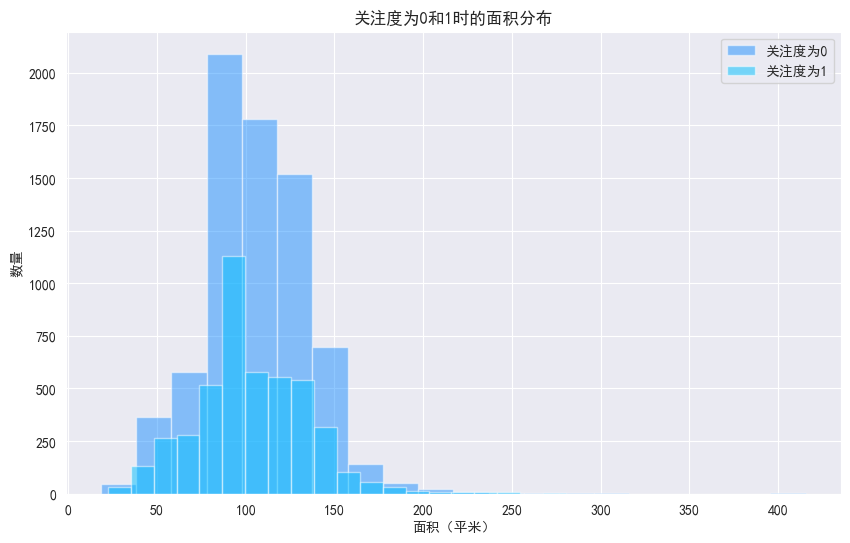

In [86]:
import pandas as pd

import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

area_zero = data[data['关注度'] == 0]['面积（平米）']
area_one = data[data['关注度'] == 1]['面积（平米）']

# 创建一个画布
plt.figure(figsize=(10, 6))

# 绘制关注度为0时的面积分布
plt.hist(area_zero, bins=20, alpha=0.5, color='dodgerblue', label='关注度为0')

# 在同一张图上绘制关注度为1时的面积分布
plt.hist(area_one, bins=20, alpha=0.5, color='deepskyblue', label='关注度为1')

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('关注度为0和1时的面积分布')
plt.xlabel('面积（平米）')
plt.ylabel('数量')

# 显示图表
plt.show()

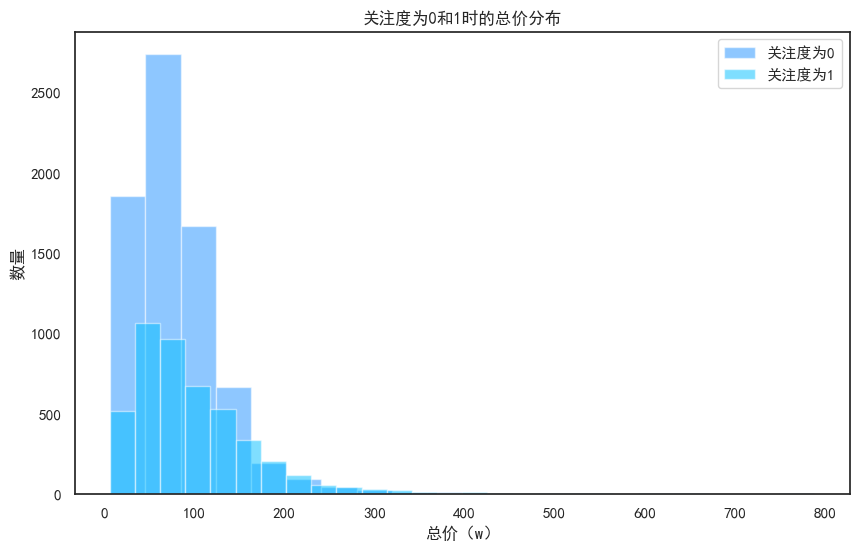

In [51]:
import pandas as pd

import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

area_zero = data[data['关注度'] == 0]['总价（w）']
area_one = data[data['关注度'] == 1]['总价（w）']

# 创建一个画布
plt.figure(figsize=(10, 6))

# 绘制关注度为0时的面积分布
plt.hist(area_zero, bins=20, alpha=0.5, color='dodgerblue', label='关注度为0')

# 在同一张图上绘制关注度为1时的面积分布
plt.hist(area_one, bins=20, alpha=0.5, color='deepskyblue', label='关注度为1')

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('关注度为0和1时的总价分布')
plt.xlabel('总价（w）')
plt.ylabel('数量')

# 显示图表
plt.show()

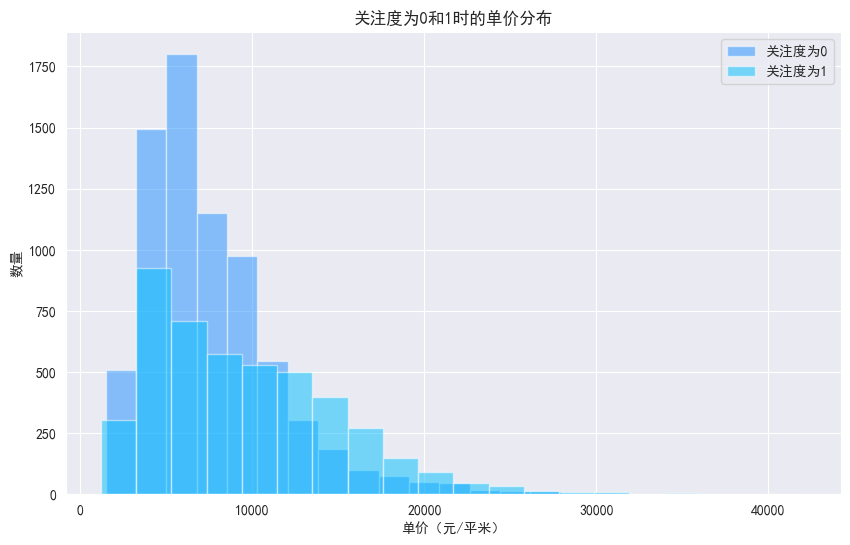

In [88]:
import pandas as pd

import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

area_zero = data[data['关注度'] == 0]['单价（元/平米）']
area_one = data[data['关注度'] == 1]['单价（元/平米）']

# 创建一个画布
plt.figure(figsize=(10, 6))

# 绘制关注度为0时的面积分布
plt.hist(area_zero, bins=20, alpha=0.5, color='dodgerblue', label='关注度为0')

# 在同一张图上绘制关注度为1时的面积分布
plt.hist(area_one, bins=20, alpha=0.5, color='deepskyblue', label='关注度为1')

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('关注度为0和1时的单价分布')
plt.xlabel('单价（元/平米）')
plt.ylabel('数量')

# 显示图表
plt.show()

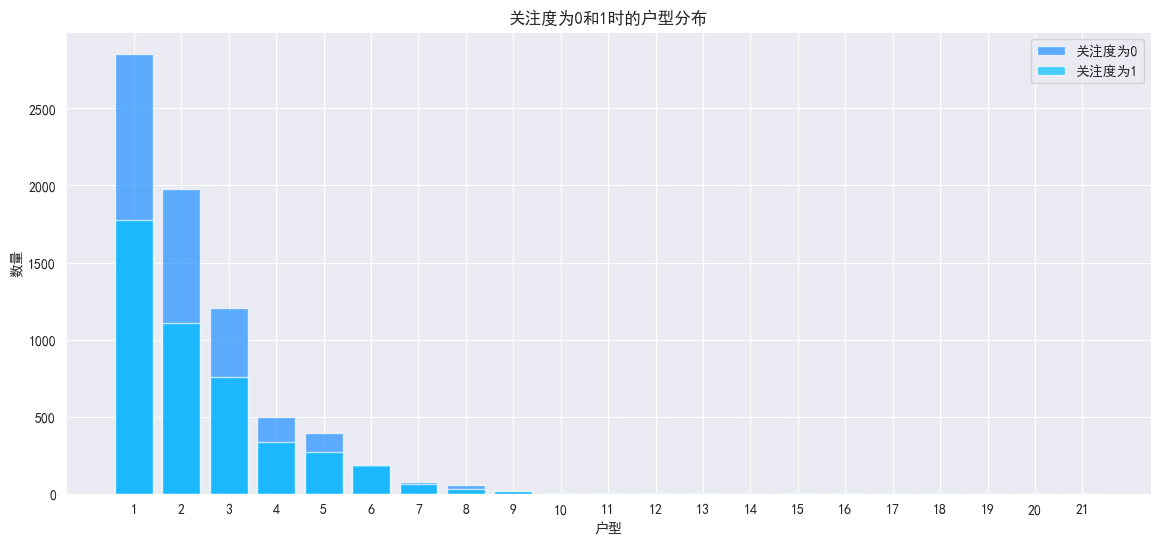

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 假设户型列名为'户型'，关注度列名为'关注度'

# 计算关注度为0和1时的户型分布
area_zero_counts = Counter(data[data['关注度'] == 0]['户型'])
area_one_counts = Counter(data[data['关注度'] == 1]['户型'])

# 获取所有可能的户型类别
all_categories = set(data['户型'])

# 确保两个计数器有相同的类别，缺失的类别数量设置为0
common_categories = area_zero_counts.keys() & area_one_counts.keys()
zero_counts = {k: area_zero_counts.get(k, 0) for k in all_categories}
one_counts = {k: area_one_counts.get(k, 0) for k in all_categories}

# 创建一个画布
plt.figure(figsize=(14, 6))

# 绘制关注度为0时的户型分布
plt.bar(range(len(all_categories)), zero_counts.values(), color='dodgerblue', alpha=0.7, label='关注度为0')

# 在同一张图上绘制关注度为1时的户型分布
plt.bar(range(len(all_categories)), one_counts.values(), color='deepskyblue', alpha=0.7, label='关注度为1')

# 设置x轴的类别标签
plt.xticks(range(len(all_categories)), all_categories)

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('关注度为0和1时的户型分布')
plt.xlabel('户型')
plt.ylabel('数量')

# 显示图表
plt.show()


In [7]:
#计算各变量之间的相关系数
corr = data.corr()
corr


,户型,面积（平米）,单价（元/平米）,总价（w）,发布时间,关注度
户型,1.00,-0.11,0.08,0.03,0.02,0.04
面积（平米）,-0.11,1.00,0.02,0.48,0.01,-0.04
单价（元/平米）,0.08,0.02,1.00,0.84,-0.09,0.20
总价（w）,0.03,0.48,0.84,1.00,-0.08,0.14
发布时间,0.02,0.01,-0.09,-0.08,1.00,0.09
关注度,0.04,-0.04,0.20,0.14,0.09,1.00


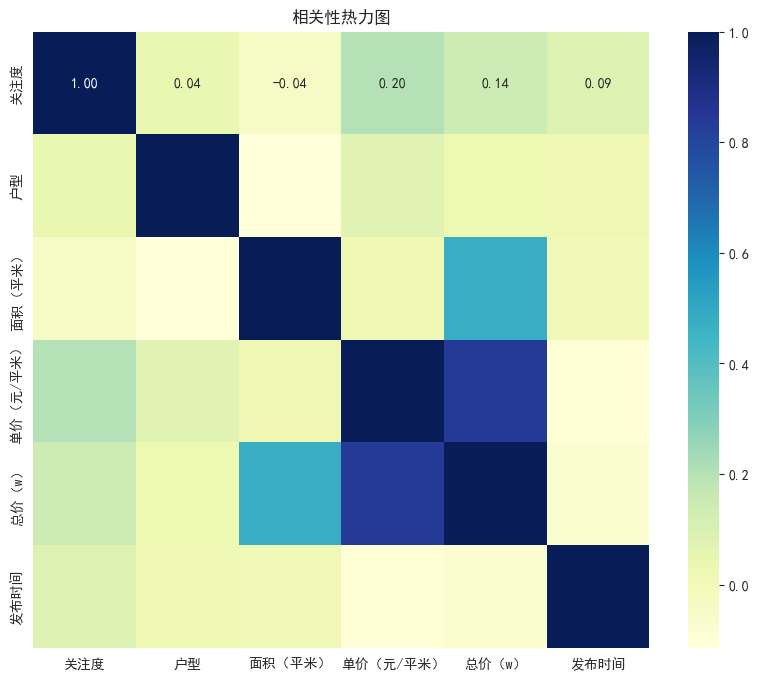

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设data是你的原始数据框
# 指定列的顺序
columns_order = ['关注度', '户型', '面积（平米）', '单价（元/平米）', '总价（w）', '发布时间']

# 确保这些列存在于数据框中，并且是数值类型
# 这里我们假设非数值列已经转换为数值类型，或者使用某种方法进行了数值化
# 如果有非数值列，需要先进行转换或处理

# 根据指定的顺序重新排列数据框
data_reordered = data[columns_order]

# 计算相关性矩阵
corr = data_reordered.corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(10, 8))  # 调整画布大小
sns.heatmap(corr, square=True, annot=True, fmt=".2f", ax=ax,cmap="YlGnBu")  # 使用".2f"来控制注解的格式
plt.title('相关性热力图')  # 添加标题
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设data是你的原始数据框
# 首先，确定你想要特征显示的新顺序，这里以字母顺序为例
new_order = data.columns.sort_values().tolist()

# 根据新顺序重新排列数据框
data_reordered = data.reindex(columns=new_order)

# 计算相关性矩阵
corr_reordered = data_reordered.corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(10, 8))  # 调整画布大小
sns.heatmap(corr_reordered, square=True, annot=True, ax=ax)
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [8]:
# 选择特征和目标变量
X = data.drop('关注度', axis=1)  # 特征：户型、面积、单价、总价
y = data['关注度']  # 目标变量

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 训练SVM模型
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


print(f'SVM Accuracy: {svm_accuracy}')


# 计算ROC曲线的数据

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred)


# 计算AUC值

auc_svm = auc(fpr_svm, tpr_svm)


# 绘制ROC曲线
plt.figure()

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % auc_svm)

plt.plot([0, 1], [0, 1], 'k--')  # 添加参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'svm_accuracy' is not defined

In [46]:
import numpy as np
from sklearn.metrics import roc_auc_score

# 计算KS值
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
ks = roc_auc_score(y_test, dt_pred_prob)  # KS值即为AUC值

# 计算KS曲线的累积分布
cumulative_tp = np.cumsum(sorted(dt_pred_prob[y_test == 1]))  # 正类的累积分布
cumulative_fp = np.cumsum(sorted(dt_pred_prob[y_test == 0]))  # 负类的累积分布

# 计算KS曲线的值
ks_curve = np.max(cumulative_tp - cumulative_fp)

# 绘制KS曲线
plt.figure(figsize=(8, 6))
plt.plot(cumulative_tp, label='Cumulative True Positives')
plt.plot(cumulative_fp, label='Cumulative False Positives')
plt.axhline(y=ks_curve, color='r', linestyle='--', label=f'KS = {ks_curve:.2f}')
plt.title('KS Curve')
plt.xlabel('Sorted Probability')
plt.ylabel('Cumulative Count')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (890,) (1486,) 

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf = clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)#返回预测的准确accuracy
score

0.7394781144781145

In [11]:
feature_name = ['户型',  '面积（平米）',  '单价（元/平米）' , '总价（w）',  '发布时间']
[*zip(feature_name,clf.feature_importances_)]

[('户型', 0.05739038027505541),
 ('面积（平米）', 0.3220271688178314),
 ('单价（元/平米）', 0.3296269135881725),
 ('总价（w）', 0.16686595831920137),
 ('发布时间', 0.12408957899973935)]

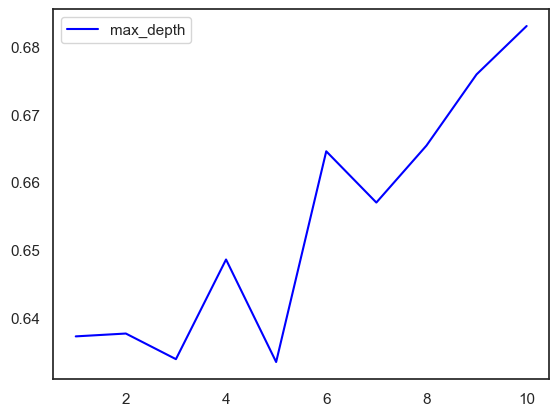

In [12]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,criterion="entropy",random_state=30,splitter="random")
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="blue",label="max_depth")
plt.legend()
plt.show()

In [42]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,max_depth=6
                                  ,splitter="random"
                                  ,min_samples_leaf=50
                                  ,min_samples_split=50
                                 )
clf = clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)#返回预测的准确accuracy
score

0.6473063973063973

    预测值  实际值
0     0    0
1     0    0
2     0    1
3     0    1
4     1    0
5     0    0
6     1    0
7     0    0
8     0    0
9     0    1
10    0    0
11    0    0
12    0    0
13    0    1
14    0    0
15    0    0
16    0    0
17    0    0
18    0    1
19    0    0
0.6473063973063973
分类准确率为: 64.730640%
   工资小于50K概率  工资大于50K概率
0       0.66       0.34
1       0.84       0.16
2       0.57       0.43
3       0.57       0.43
4       0.30       0.70
           0（预测无关注度）  1（预测有关注度）
0（实际无关注度）       1355        131
1（实际有关注度）        707        183
              precision    recall  f1-score   support

           0       0.66      0.91      0.76      1486
           1       0.58      0.21      0.30       890

    accuracy                           0.65      2376
   macro avg       0.62      0.56      0.53      2376
weighted avg       0.63      0.65      0.59      2376

    阈值  假警报率  命中率
0 1.80  0.00 0.00
1 0.80  0.01 0.02
2 0.77  0.01 0.03
3 0.70  0.02 0.05
4 0.66  0.03 0.10
     阈值  假警报率 

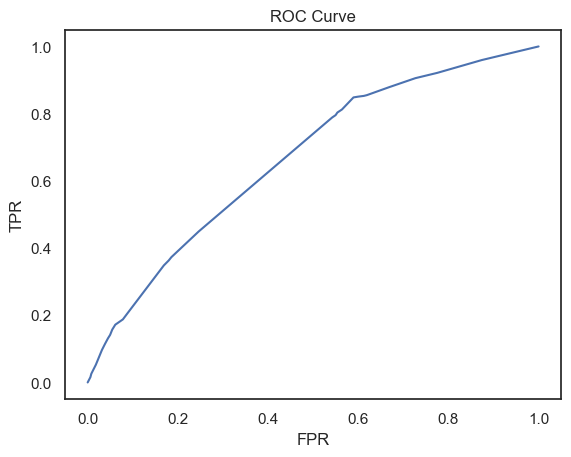

AUC score is 0.666234
AUC score is 0.666234


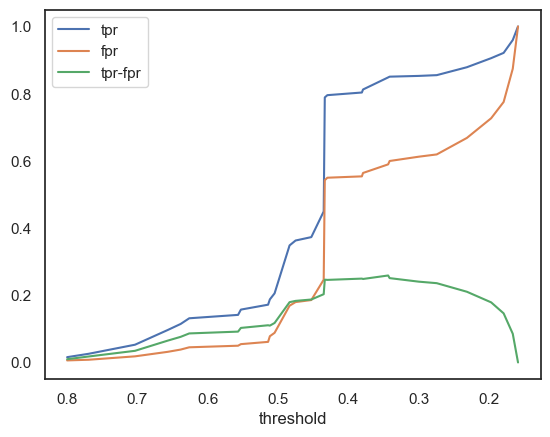

     阈值  假警报率  命中率  TPR-FPR
20 0.34  0.59 0.85     0.26
      分类为0的概率  分类为1的概率
1720     0.20     0.80
1799     0.20     0.80
1047     0.20     0.80
1123     0.20     0.80
2211     0.20     0.80
1863     0.20     0.80
1191     0.20     0.80
1520     0.20     0.80
86       0.20     0.80
579      0.20     0.80
573      0.20     0.80
339      0.20     0.80
2358     0.20     0.80
1661     0.20     0.80
103      0.20     0.80


In [50]:


### 模型使用1 - 预测数据结果
y_pred = clf.predict(X_test)
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
print(a.head(20))

# 查看分类准确率
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

print('分类准确率为: %f%%' % (clf.score(X_test, y_test) * 100))

### 模型使用2 - 预测概率
y_pred_proba = clf.predict_proba(X_test)  
a = pd.DataFrame(y_pred_proba, columns=['工资小于50K概率', '工资大于50K概率'])
print(a.head())

model = clf

### 计算混淆矩阵
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred)
a = pd.DataFrame(m, index=['0（实际无关注度）', '1（实际有关注度）'],
                 columns=['0（预测无关注度）', '1（预测有关注度）'])
print(a)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### 绘制ROC曲线
from sklearn.metrics import roc_curve
#y_test = y_test - 1
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])
a = pd.DataFrame()
a['阈值'] = thres
a['假警报率'] = fpr
a['命中率'] = tpr
print(a.head())
print(a.tail())

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### 计算AUC
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print('AUC score is %f' % score)
### 或者用auc来计算
from sklearn.metrics import auc
score1 = auc(fpr, tpr)
print('AUC score is %f' % score1)

### 绘制KS曲线并求KS值
plt.plot(thres[1:], tpr[1:])
plt.plot(thres[1:], fpr[1:])
plt.plot(thres[1:], tpr[1:] - fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr', 'fpr', 'tpr-fpr'])
plt.gca().invert_xaxis()
plt.show()

a['TPR-FPR'] = tpr - fpr
print(a[a['TPR-FPR'] == max(a['TPR-FPR'])])



# ROC曲线中阈值来源
b = pd.DataFrame(y_pred_proba, columns=['分类为0的概率','分类为1的概率'])
b = b.sort_values(by='分类为1的概率', ascending=False)
print(b.head(15))